In [1]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

Using TensorFlow backend.


Initialized TensorFlow


In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [4]:
repetitions = 10
Ns = np.arange(10, 200, 20)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 100


In [5]:
def q_factor_v(vect):
    """ q = v^min/v^min, see the main paper """
    vect = np.abs(vect)
    assert np.max(vect) > 0, "Cannot compute for vector of zeros """
    return np.min(vect) / np.max(vect)
def q_factor_l1(exp):
    """ q-factor for layer 1 of an experiment """
    W = exp.W[0]
    
    # here taking sum for 1st axis since it's not transposed here
    q = q_factor_v(np.sum(np.abs(W), axis = 1))
    
    return q
def d_kl(a, b):
    """ KL-divergence between numbers """
    a, b = float(a), float(b)
    return a * np.log(a / b) + (1 - a) * np.log((1 - a) / (1 - b))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 49)                539       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 50        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 602us/step - loss: 532.1563 - categorical_accuracy: 1.0000 - mean_squared_error: 526.0643 - mean_absolute_error: 20.9733 - val_loss: 557.1177 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 551.1407 - val_mean_absolute_error: 21.5888
Epoch 2/200
404/404 [==============================] - 0s

Epoch 26/200
404/404 [==============================] - 0s 5us/step - loss: 470.1508 - categorical_accuracy: 1.0000 - mean_squared_error: 465.8106 - mean_absolute_error: 19.4937 - val_loss: 492.3690 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 488.0535 - val_mean_absolute_error: 20.0886
Epoch 27/200
404/404 [==============================] - 0s 5us/step - loss: 466.6564 - categorical_accuracy: 1.0000 - mean_squared_error: 462.3409 - mean_absolute_error: 19.4042 - val_loss: 488.0665 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 483.8089 - val_mean_absolute_error: 19.9822
Epoch 28/200
404/404 [==============================] - 0s 5us/step - loss: 462.4788 - categorical_accuracy: 1.0000 - mean_squared_error: 458.2213 - mean_absolute_error: 19.2969 - val_loss: 482.7903 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 478.5694 - val_mean_absolute_error: 19.8507
Epoch 29/200
404/404 [==============================] - 0s 5us/step - loss: 457.3905 - c

Epoch 53/200
404/404 [==============================] - 0s 6us/step - loss: 176.0059 - categorical_accuracy: 1.0000 - mean_squared_error: 172.4783 - mean_absolute_error: 9.9810 - val_loss: 180.4387 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 176.9449 - val_mean_absolute_error: 10.7376
Epoch 54/200
404/404 [==============================] - 0s 5us/step - loss: 169.0144 - categorical_accuracy: 1.0000 - mean_squared_error: 165.5206 - mean_absolute_error: 9.6844 - val_loss: 173.4814 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 170.0080 - val_mean_absolute_error: 10.4676
Epoch 55/200
404/404 [==============================] - 0s 5us/step - loss: 162.5455 - categorical_accuracy: 1.0000 - mean_squared_error: 159.0721 - mean_absolute_error: 9.4100 - val_loss: 167.0421 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 163.5907 - val_mean_absolute_error: 10.2077
Epoch 56/200
404/404 [==============================] - 0s 5us/step - loss: 156.5596 - cate

Epoch 81/200
404/404 [==============================] - 0s 5us/step - loss: 94.4040 - categorical_accuracy: 1.0000 - mean_squared_error: 91.3973 - mean_absolute_error: 6.4990 - val_loss: 96.8915 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 93.9033 - val_mean_absolute_error: 6.9599
Epoch 82/200
404/404 [==============================] - 0s 6us/step - loss: 93.5646 - categorical_accuracy: 1.0000 - mean_squared_error: 90.5764 - mean_absolute_error: 6.4650 - val_loss: 95.9222 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 92.9566 - val_mean_absolute_error: 6.9062
Epoch 83/200
404/404 [==============================] - 0s 5us/step - loss: 92.7456 - categorical_accuracy: 1.0000 - mean_squared_error: 89.7799 - mean_absolute_error: 6.4322 - val_loss: 95.0011 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 92.0398 - val_mean_absolute_error: 6.8499
Epoch 84/200
404/404 [==============================] - 0s 5us/step - loss: 91.9449 - categorical_accuracy

Epoch 109/200
404/404 [==============================] - 0s 6us/step - loss: 80.3169 - categorical_accuracy: 1.0000 - mean_squared_error: 77.7224 - mean_absolute_error: 5.9544 - val_loss: 81.8522 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 79.2636 - val_mean_absolute_error: 6.2311
Epoch 110/200
404/404 [==============================] - 0s 5us/step - loss: 79.9962 - categorical_accuracy: 1.0000 - mean_squared_error: 77.4076 - mean_absolute_error: 5.9304 - val_loss: 81.4956 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 78.9283 - val_mean_absolute_error: 6.2204
Epoch 111/200
404/404 [==============================] - 0s 5us/step - loss: 79.6766 - categorical_accuracy: 1.0000 - mean_squared_error: 77.1093 - mean_absolute_error: 5.9109 - val_loss: 81.1570 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 78.5969 - val_mean_absolute_error: 6.2096
Epoch 112/200
404/404 [==============================] - 0s 5us/step - loss: 79.3860 - categorical_accu

Epoch 137/200
404/404 [==============================] - 0s 5us/step - loss: 74.5421 - categorical_accuracy: 1.0000 - mean_squared_error: 72.2819 - mean_absolute_error: 5.7625 - val_loss: 75.5035 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 73.2539 - val_mean_absolute_error: 6.0712
Epoch 138/200
404/404 [==============================] - 0s 5us/step - loss: 74.3570 - categorical_accuracy: 1.0000 - mean_squared_error: 72.1073 - mean_absolute_error: 5.7528 - val_loss: 75.1744 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 72.9277 - val_mean_absolute_error: 6.0645
Epoch 139/200
404/404 [==============================] - 0s 5us/step - loss: 74.1906 - categorical_accuracy: 1.0000 - mean_squared_error: 71.9439 - mean_absolute_error: 5.7450 - val_loss: 75.1825 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 72.9574 - val_mean_absolute_error: 6.0658
Epoch 140/200
404/404 [==============================] - 0s 5us/step - loss: 73.9607 - categorical_accu

Epoch 165/200
404/404 [==============================] - 0s 5us/step - loss: 69.2120 - categorical_accuracy: 1.0000 - mean_squared_error: 67.2275 - mean_absolute_error: 5.4752 - val_loss: 69.9853 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 68.0150 - val_mean_absolute_error: 5.9696
Epoch 166/200
404/404 [==============================] - 0s 5us/step - loss: 69.1190 - categorical_accuracy: 1.0000 - mean_squared_error: 67.1487 - mean_absolute_error: 5.4769 - val_loss: 69.8779 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 67.9148 - val_mean_absolute_error: 5.9710
Epoch 167/200
404/404 [==============================] - 0s 5us/step - loss: 69.0364 - categorical_accuracy: 1.0000 - mean_squared_error: 67.0733 - mean_absolute_error: 5.4786 - val_loss: 69.7750 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 67.8155 - val_mean_absolute_error: 5.9725
Epoch 168/200
404/404 [==============================] - 0s 6us/step - loss: 68.9603 - categorical_accu

Epoch 193/200
404/404 [==============================] - 0s 5us/step - loss: 67.6363 - categorical_accuracy: 1.0000 - mean_squared_error: 65.8963 - mean_absolute_error: 5.5477 - val_loss: 67.8604 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 66.1245 - val_mean_absolute_error: 6.0111
Epoch 194/200
404/404 [==============================] - 0s 5us/step - loss: 67.6076 - categorical_accuracy: 1.0000 - mean_squared_error: 65.8717 - mean_absolute_error: 5.5507 - val_loss: 67.8139 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 66.0825 - val_mean_absolute_error: 6.0124
Epoch 195/200
404/404 [==============================] - 0s 6us/step - loss: 67.5795 - categorical_accuracy: 1.0000 - mean_squared_error: 65.8481 - mean_absolute_error: 5.5540 - val_loss: 67.7569 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 66.0427 - val_mean_absolute_error: 6.0136
Epoch 196/200
404/404 [==============================] - 0s 5us/step - loss: 67.5400 - categorical_accu

/localhome/xxxx/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


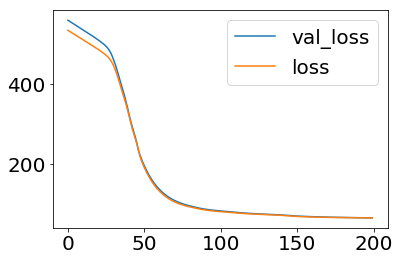

Creating network for 13-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
Crashes (Lambda)             (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 49)                539       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 50        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                

In [6]:
exp = BostonHousingExperiment(N = [10, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = True,
                                  reg_coeff = 1, reg_type = 'balanced')

In [7]:
# printing the q-factor
q_factor_l1(exp)

0.7706318

In [8]:
# obtaining one input
x = np.array([exp.x_train[0]])
y = np.array([exp.y_train[0]])

In [9]:
def train_the_net(N = 50, mu = 1):
    """ Train a network with given size N and compute mean FT variance
         Returns: dict mean -> mean error on example, std -> std error on example, q -- q factor
    """
    K.clear_session()
    
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = mu, reg_type = 'balanced')
    
    
    # obtaining the q factor
    q = q_factor_l1(exp)
    
    print('Loss: %s' % str(exp.get_mae_correct()))

    # obtaining errors and bounds for data points
    #rmean, rstd = exp.run(data, repetitions = 10000)
    
    # theoretical mean/variance
    # this is Var/mean Delta from Prop. 4
    r = exp._get_bound_b3_loss(x, y)
    r.update({'q': q})

    return r

In [10]:
# alpha from the proof
alpha = np.e ** 2 * p
assert alpha < 1, "Must have a non-trivial guarantee on weight perturbation"

In [11]:
# TARGET desired probability of failure
delta_target = 1e-5

# TARGET loss perturbation (will guarantee it happens with prob. at most delta_target)
eps_target = 1.

In [12]:
N = 1 # starting N
mu = 1 # starting mu

In [13]:
def inc_n():
    global N
    # increasing number of neurons...
    N = N + 10

Trying 1 1.000000


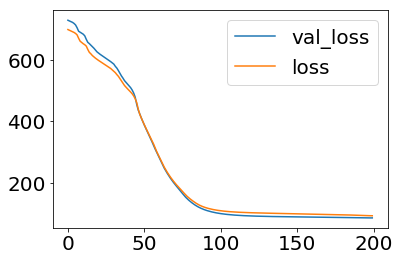

Loss: {'train': 6.9875849733258235, 'test': 6.738496339087393}
Perturbation must be small but delta_0=0.917596, consider increasing n
Trying 11 1.000000


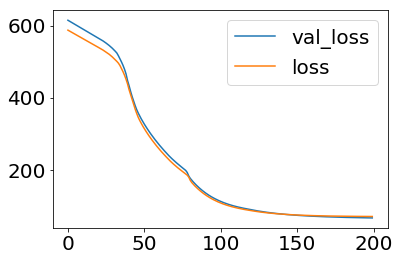

Loss: {'train': 5.779567027800154, 'test': 5.93452911750943}
Perturbation must be small but delta_0=0.389706, consider increasing n
Trying 21 1.000000


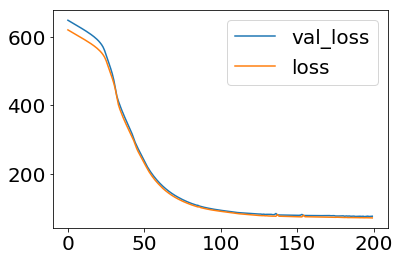

Loss: {'train': 5.840581404808725, 'test': 6.28586540222168}
Perturbation must be small but delta_0=0.249180, consider increasing n
Trying 31 1.000000


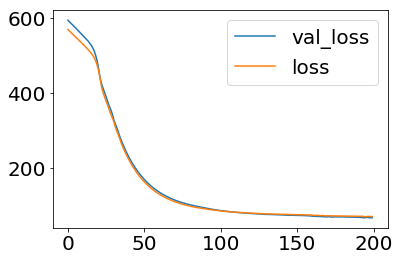

Loss: {'train': 5.728093668021779, 'test': 5.957073568830303}
Perturbation must be small but delta_0=0.170403, consider increasing n
Trying 41 1.000000


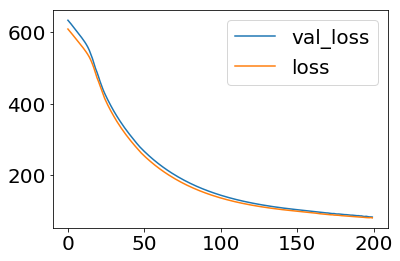

Loss: {'train': 5.773920831585874, 'test': 6.358228410459032}
Need N = 41, mu=1.00 and R = 20
To achieve eps=1.000000 delta=0.000010 fault tolerance


In [14]:
while True:
    print('Trying %d %f' % (N, mu))
    r = train_the_net(N = N, mu = mu)
    if r['q'] <= 1e-2:
        print("Q must be >0.01, consider increasing mu")
        mu = 2 * mu
        continue
        
    # delta_0 from Prop. 3
    delta_0 = np.exp(-N * d_kl(alpha, p) * r['q'])
    if delta_0 > 1. / 6:
        print("Perturbation must be small but delta_0=%f, consider increasing n" % delta_0)
        inc_n()
        continue
        
    if r['mean'] >= eps_target:
        print("Cannot do better than the mean, infeasible!")
        break
        
    # t from Prop. 5
    # sum to make it a scalar
    t = np.sum(eps_target - r['mean'])
    
    if t ** (-2) * r['std'] ** 2 >= 1. / 6:
        print("Must have eps^2 ~ Variance, otherwise Chebyshev would not work!")
        inc_n()
        continue
        
    # now we have delta_0 < 1/6 and delta-delta_0 < 1 / 6 which makes delta < 1/3
    
    # computing the number of repetitions
    # (1/3)^(R/2)<delta_target -> delta_target => R = 2 log (1 / delta_target) / log(3)
    R = 2 * np.log(1 / delta_target) / np.log(3)
    
    print('Need N = %d, mu=%.2f and R = %d' % (N, mu, R))
    print('To achieve eps=%f delta=%f fault tolerance' % (eps_target, delta_target))
    
    break

Empirically validating that $\delta<1/3$

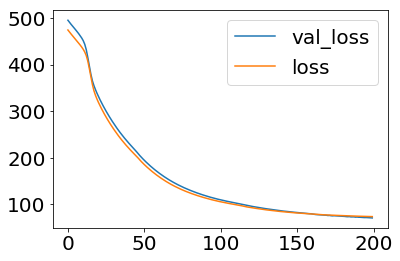

In [15]:
# taking the net
exp = BostonHousingExperiment(N = [41, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = 1, reg_type = 'balanced')

In [16]:
def experimental_error():
    """ Experimental delta_L+1 on input x, y """
    return exp.get_mse_crash_data(x, y, repetitions = 1) - exp.get_mse_correct_data(x, y)

In [17]:
# the experimental error
dta = [experimental_error() for _ in range(10000)]

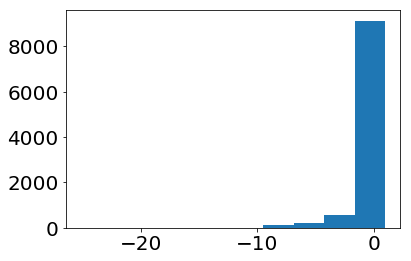

In [18]:
# histogram
plt.hist(dta)
plt.show()

In [19]:
assert np.mean(np.array(dta) > eps_target) < delta_target, "Tail bound must be valid"

The bound is valid. Actually, the loss error is mostly _negative_ for this example